In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
# Load the dataset (replace 'your_dataset.csv' with the actual file name)
data = pd.read_csv('/home/rakshit/stats prt/Bengaluru_House_Data.csv')



In [8]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [10]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [11]:
data.isnull().sum()


area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [16]:
# Handle missing values if necessary
# data = data.fillna(value)

# Create new features if relevant
# data['new_feature'] = ...

# Encode categorical variables if needed
# data = pd.get_dummies(data, columns=['categorical_feature'])

# Split the data into features (X) and target variable (y)
X = data.drop('price', axis=1)
y = data['price']


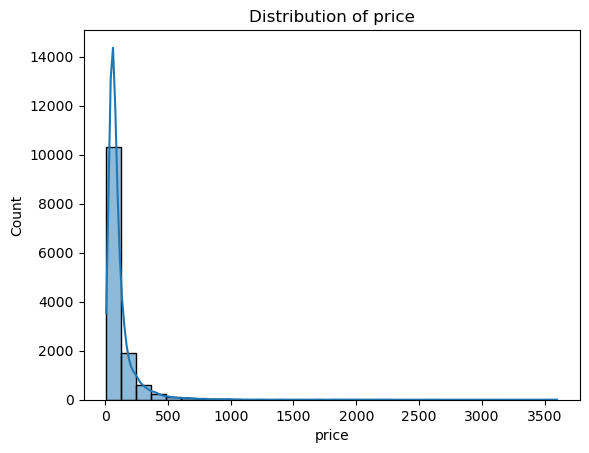

In [18]:

sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribution of price')
plt.show()





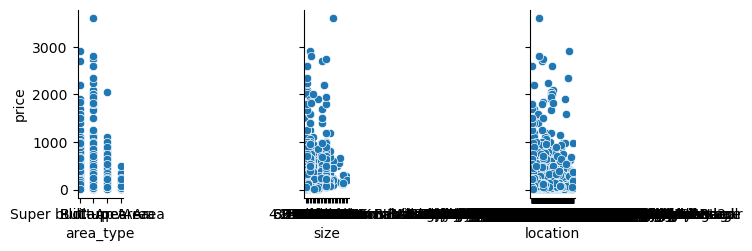

In [21]:

sns.pairplot(data, x_vars=['area_type', 'size','location'], y_vars='price', kind='scatter')
plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [27]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['area_type'] = label_encoder.fit_transform(data['area_type'])


In [28]:
print(data.dtypes)


area_type         int64
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object


In [ ]:

svm_regressor = SVR(kernel='linear', C=1.0)  # Adjust hyperparameters
svm_regressor.fit(X_train_scaled, y_train)


In [ ]:
# Predict on the test set
y_pred = svm_regressor.predict(X_test_scaled)

# Evaluate performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
